In [1]:
import pandas as pd
import numpy as np

### 데이터 수집, 준비

In [159]:
baby_df = pd.read_csv("./babyInfo.csv")
baby_df

,_id,days,desc,gender,__v,growth
0,6355f90b520fc1161d430b2a,0,20일 mn 부터 21 md 꼬박 열두시간을 \n유도분만 끝에 실패 .....c/...,F,0,NaN
1,62f8dd9bc2d4a7f9032b9c8d,0,총 수유량: 430 cc\n소변 횟수: 16\n대변: 2,F,0,"{'weight': {'value': 2.77, 'unit': 'kg', 'std'..."
2,6261cb9eee57fb52c7c7210a,0,4월 21일 목요일\n\n밤 9시 병원 \n자궁수축 50\n경부 1cm\n진통 심함...,F,0,NaN
3,61938fa93433d7ca11307585,0,내일이면 우리 또복이 곧 태여날 것입니다~엄마 아빠 너무너무 셀레고 긴장되고 기대가...,M,0,NaN
4,6126a5d95aba962baf30b061,0,39주6일 한복이탄생일🖤 도치맘등극😂,F,0,"{'height': {'value': 49, 'unit': 'cm', 'std': ..."
...,...,...,...,...,...,...
228298,600db044e3feb139a82d17cb,135,4개월 원더윅스가 이런것인가..\n\n너무 안쓰런 울애기\n목욕하고 쓰러지듯 잠들더...,M,0,"{'weight': {'value': 7.3, 'unit': 'kg', 'std':..."
228299,60084b1aff925e1bdd5a5453,135,드디어 백일촬영 끝~~\n총 4콘셉을 찍는건데 처음에 갔을때 두컨셉 찍고\n오늘 나...,F,0,NaN
228300,60011980ff925e1bdd37c058,135,낮잠 안자고도 밤잠 안자려 버틴다. 3번 실패후 4번째 눕히자 혼자 중얼거리다가 잠...,F,0,NaN
228301,5fed0afcb404d75b9e45b63b,135,혼자 뒤집기 성공,M,0,NaN


In [122]:
baby_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228303 entries, 0 to 228302
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   _id     228303 non-null  object
 1   days    228303 non-null  int64 
 2   desc    172609 non-null  object
 3   gender  228301 non-null  object
 4   __v     228303 non-null  int64 
 5   growth  113527 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.5+ MB


In [123]:
baby_df.isna().sum()

_id            0
days           0
desc       55694
gender         2
__v            0
growth    114776
dtype: int64

In [160]:
baby_growth_df = baby_df.dropna(subset=['growth','gender']) # growth, gender 결측치 제거
baby_growth_df

,_id,days,desc,gender,__v,growth
1,62f8dd9bc2d4a7f9032b9c8d,0,총 수유량: 430 cc\n소변 횟수: 16\n대변: 2,F,0,"{'weight': {'value': 2.77, 'unit': 'kg', 'std'..."
4,6126a5d95aba962baf30b061,0,39주6일 한복이탄생일🖤 도치맘등극😂,F,0,"{'height': {'value': 49, 'unit': 'cm', 'std': ..."
6,5f2029e1d00f40614904254f,0,"d-1, 예정일보다 하루빨리 태어난 우리 꼬물이ღ\n2020 07 28, am01:...",F,0,"{'height': {'value': 47, 'unit': 'cm', 'std': ..."
7,5eead032fa916d81a3886820,0,NaN,F,0,"{'height': {'value': 55, 'unit': 'cm', 'std': ..."
10,5e3ce41414952390ba35e28e,0,NaN,F,0,"{'height': {'value': 50, 'unit': 'cm', 'std': ..."
...,...,...,...,...,...,...
228292,604c430ec1702c2730c6d0e9,135,"분유 양이 줄어 걱정햇는데 잘크고 있다\n태어난 몸무게 딱 2배 됏구,\n\n피부 ...",F,0,"{'height': {'value': 67, 'unit': 'cm', 'std': ..."
228293,603e8290de6eeaaca4b8a535,135,여원이 뒤집기 반 성공!\n반성공인 이유는 스스로 별로 뒤집을 생각은 없음\n그러나...,F,0,"{'weight': {'value': 8.1, 'unit': 'kg', 'std':..."
228294,603c9529c5f15932e1040246,135,"4개월 11일 (134day) 발달기록\n꺄르르 꺄르르 웃는, 예뻐서 죽을 것 같은...",M,0,"{'height': {'value': 65.5, 'unit': 'cm', 'std'..."
228297,6019b7af10a0da5fc9f8ede2,135,NaN,F,0,"{'height': {'value': 70, 'unit': 'cm', 'std': ..."


In [161]:
baby_growth_df.isna().sum()

_id           0
days          0
desc      54050
gender        0
__v           0
growth        0
dtype: int64

In [162]:
baby_growth_df['growth']

1         {'weight': {'value': 2.77, 'unit': 'kg', 'std'...
4         {'height': {'value': 49, 'unit': 'cm', 'std': ...
6         {'height': {'value': 47, 'unit': 'cm', 'std': ...
7         {'height': {'value': 55, 'unit': 'cm', 'std': ...
10        {'height': {'value': 50, 'unit': 'cm', 'std': ...
                                ...                        
228292    {'height': {'value': 67, 'unit': 'cm', 'std': ...
228293    {'weight': {'value': 8.1, 'unit': 'kg', 'std':...
228294    {'height': {'value': 65.5, 'unit': 'cm', 'std'...
228297    {'height': {'value': 70, 'unit': 'cm', 'std': ...
228298    {'weight': {'value': 7.3, 'unit': 'kg', 'std':...
Name: growth, Length: 113527, dtype: object

In [163]:
#baby_growth_df['height'] = baby_growth_df['growth'].apply(lambda x: x['height']['value']) -> 에러(결측치 존재)
#baby_growth_df['weight'] = baby_growth_df['growth'].apply(lambda x: x['weight']['value']) -> 에러(결측치 존재)
import ast
baby_growth_df['growth'] = baby_growth_df['growth'].apply(ast.literal_eval) # 문자열 -> 딕셔너리 형태로 변환
baby_growth_df['height'] = baby_growth_df['growth'].apply(lambda x: x.get('height', {}).get('value', None))
baby_growth_df['weight'] = baby_growth_df['growth'].apply(lambda x: x.get('weight', {}).get('value', None))

C:\Users\김주영\AppData\Local\Temp/ipykernel_30736/1173788808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_growth_df['growth'] = baby_growth_df['growth'].apply(ast.literal_eval) # 문자열 -> 딕셔너리 형태로 변환
C:\Users\김주영\AppData\Local\Temp/ipykernel_30736/1173788808.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baby_growth_df['height'] = baby_growth_df['growth'].apply(lambda x: x.get('height', {}).get('value', None))
C:\Users\김주영\AppData\Local\Temp/ipykernel_30736/1173788808.py:6: SettingWithCopyWarni

In [164]:
baby_growth_df

,_id,days,desc,gender,__v,growth,height,weight
1,62f8dd9bc2d4a7f9032b9c8d,0,총 수유량: 430 cc\n소변 횟수: 16\n대변: 2,F,0,"{'weight': {'value': 2.77, 'unit': 'kg', 'std'...",NaN,2.77
4,6126a5d95aba962baf30b061,0,39주6일 한복이탄생일🖤 도치맘등극😂,F,0,"{'height': {'value': 49, 'unit': 'cm', 'std': ...",49.0,2.94
6,5f2029e1d00f40614904254f,0,"d-1, 예정일보다 하루빨리 태어난 우리 꼬물이ღ\n2020 07 28, am01:...",F,0,"{'height': {'value': 47, 'unit': 'cm', 'std': ...",47.0,2.41
7,5eead032fa916d81a3886820,0,NaN,F,0,"{'height': {'value': 55, 'unit': 'cm', 'std': ...",55.0,3.81
10,5e3ce41414952390ba35e28e,0,NaN,F,0,"{'height': {'value': 50, 'unit': 'cm', 'std': ...",50.0,3.32
...,...,...,...,...,...,...,...,...
228292,604c430ec1702c2730c6d0e9,135,"분유 양이 줄어 걱정햇는데 잘크고 있다\n태어난 몸무게 딱 2배 됏구,\n\n피부 ...",F,0,"{'height': {'value': 67, 'unit': 'cm', 'std': ...",67.0,7.60
228293,603e8290de6eeaaca4b8a535,135,여원이 뒤집기 반 성공!\n반성공인 이유는 스스로 별로 뒤집을 생각은 없음\n그러나...,F,0,"{'weight': {'value': 8.1, 'unit': 'kg', 'std':...",NaN,8.10
228294,603c9529c5f15932e1040246,135,"4개월 11일 (134day) 발달기록\n꺄르르 꺄르르 웃는, 예뻐서 죽을 것 같은...",M,0,"{'height': {'value': 65.5, 'unit': 'cm', 'std'...",65.5,8.20
228297,6019b7af10a0da5fc9f8ede2,135,NaN,F,0,"{'height': {'value': 70, 'unit': 'cm', 'std': ...",70.0,8.80


In [165]:
baby_growth_df['height'].isna().sum()

69522

In [166]:
baby_growth_df['weight'].isna().sum()

1311

In [167]:
baby_growth_df[baby_growth_df['weight'].isna() & baby_growth_df['height'].isna()] # height,weight 둘 다 결측치인 행 확인

,_id,days,desc,gender,__v,growth,height,weight
2239,63490ebc4f30a39628aefdc9,19,어찌저찌 어제보다는 오늘 한결 수월하다!\n그래도 할일은 너무 많고\n너가 울면 어...,M,0,"{'head': {'value': 37, 'unit': 'cm', 'std': 37}}",NaN,NaN
6393,63a96fee0ec395c9ce32feb3,54,NaN,M,0,"{'head': {'value': 39, 'unit': 'cm', 'std': 39}}",NaN,NaN
9350,6325346f204f507df3e5a1b3,78,78일차 아가 성장표\n\n🎀모빌도 좋아하지만 이제는 아기체육관을 더 좋아함\n🎀잘...,F,0,"{'head': {'value': 41, 'unit': 'cm', 'std': 41}}",NaN,NaN
9414,638bd1daffe5f9567ae18982,79,🤎11시간 통잠 4일차 \n🤎밤잠 시작 시간을 7:30pm으로 본인이 정한 듯함\n...,F,0,"{'head': {'value': 39, 'unit': 'cm', 'std': 39}}",NaN,NaN
9920,63639f4e7382e0031c9b5560,83,NaN,M,0,"{'head': {'value': 39.6, 'unit': 'cm', 'std': ...",NaN,NaN
...,...,...,...,...,...,...,...,...
223985,590c7241b9ede03a5c586eb9,131,NaN,M,0,"{'head': {'std': 43, 'value': 43, 'unit': 'cm'}}",NaN,NaN
224346,61080e04babd662a6282d83c,132,NaN,M,0,"{'head': {'value': 42.5, 'unit': 'cm', 'std': ...",NaN,NaN
225178,59bfb0b41787fa4328598fe9,132,NaN,M,0,"{'head': {'unit': 'cm', 'value': 43, 'std': 43}}",NaN,NaN
226391,5a1cb41c01a81b7476aa0877,133,NaN,M,0,"{'head': {'value': 42.9, 'unit': 'cm', 'std': ...",NaN,NaN


In [168]:
baby_growth_df = baby_growth_df.dropna(axis='index', how='all', subset=['height','weight']) # 둘 다 결측치인 행 제거

In [169]:
baby_growth_df

,_id,days,desc,gender,__v,growth,height,weight
1,62f8dd9bc2d4a7f9032b9c8d,0,총 수유량: 430 cc\n소변 횟수: 16\n대변: 2,F,0,"{'weight': {'value': 2.77, 'unit': 'kg', 'std'...",NaN,2.77
4,6126a5d95aba962baf30b061,0,39주6일 한복이탄생일🖤 도치맘등극😂,F,0,"{'height': {'value': 49, 'unit': 'cm', 'std': ...",49.0,2.94
6,5f2029e1d00f40614904254f,0,"d-1, 예정일보다 하루빨리 태어난 우리 꼬물이ღ\n2020 07 28, am01:...",F,0,"{'height': {'value': 47, 'unit': 'cm', 'std': ...",47.0,2.41
7,5eead032fa916d81a3886820,0,NaN,F,0,"{'height': {'value': 55, 'unit': 'cm', 'std': ...",55.0,3.81
10,5e3ce41414952390ba35e28e,0,NaN,F,0,"{'height': {'value': 50, 'unit': 'cm', 'std': ...",50.0,3.32
...,...,...,...,...,...,...,...,...
228292,604c430ec1702c2730c6d0e9,135,"분유 양이 줄어 걱정햇는데 잘크고 있다\n태어난 몸무게 딱 2배 됏구,\n\n피부 ...",F,0,"{'height': {'value': 67, 'unit': 'cm', 'std': ...",67.0,7.60
228293,603e8290de6eeaaca4b8a535,135,여원이 뒤집기 반 성공!\n반성공인 이유는 스스로 별로 뒤집을 생각은 없음\n그러나...,F,0,"{'weight': {'value': 8.1, 'unit': 'kg', 'std':...",NaN,8.10
228294,603c9529c5f15932e1040246,135,"4개월 11일 (134day) 발달기록\n꺄르르 꺄르르 웃는, 예뻐서 죽을 것 같은...",M,0,"{'height': {'value': 65.5, 'unit': 'cm', 'std'...",65.5,8.20
228297,6019b7af10a0da5fc9f8ede2,135,NaN,F,0,"{'height': {'value': 70, 'unit': 'cm', 'std': ...",70.0,8.80


In [170]:
baby_growth_df['gender'].unique()

array(['F', 'M', 'U'], dtype=object)

In [171]:
baby_growth_df['gender'].value_counts()

M    61139
F    52135
U       34
Name: gender, dtype: int64

In [172]:
baby_growth_df = baby_growth_df[baby_growth_df['gender'] != 'U'] # 성별이 Unknown인 행 삭제

In [173]:
# 'gender' column 추출
gender = baby_growth_df['gender']

# 'gender' column을 one-hot 인코딩하여 새로운 데이터프레임 생성
gender_onehot = pd.get_dummies(gender, prefix='gender')

# 원래 데이터프레임과 합치기
baby_growth_df = pd.concat([baby_growth_df, gender_onehot], axis=1)

# 'gender' column 삭제
baby_growth_df = baby_growth_df.drop('gender', axis=1)

In [174]:
baby_growth_df.sort_values(by='days', inplace=True) # 생후 개월 수로 오름차순 정렬

In [175]:
baby_growth_df

,_id,days,desc,__v,growth,height,weight,gender_F,gender_M
1,62f8dd9bc2d4a7f9032b9c8d,0,총 수유량: 430 cc\n소변 횟수: 16\n대변: 2,0,"{'weight': {'value': 2.77, 'unit': 'kg', 'std'...",NaN,2.77,1,0
27,58a77332aa513c7c8cf0a942,0,17.02.15\n새벽:5시50분 -이슬비침\n\n-계속 약한 배 통증있음 \n\n...,0,"{'head': {'value': 35.5, 'std': 35.5, 'unit': ...",49.0,3.20,1,0
22,59a610cf1787fa4f4a3a1905,0,NaN,0,"{'head': {'value': 34.5, 'unit': 'cm', 'std': ...",46.5,2.77,1,0
17,5ab0230abbd2ac53661aaa2a,0,NaN,0,"{'weight': {'unit': 'kg', 'value': 3.78, 'std'...",52.0,3.78,0,1
16,5ab023294ba8ac623954eec1,0,청각검사 정상,0,"{'weight': {'unit': 'kg', 'std': 3.78, 'value'...",52.0,3.78,0,1
...,...,...,...,...,...,...,...,...,...
43779,60fd1030d88d65dfa2625762,365,NaN,0,"{'height': {'value': 79.7, 'unit': 'cm', 'std'...",79.7,10.30,0,1
43780,60e7cd722f0e2f96d8e1b099,365,젖병떼기 연습.\n빨대컵에 분유주기 시작.,0,"{'weight': {'value': 9.4, 'unit': 'kg', 'std':...",NaN,9.40,1,0
43783,60ac47a2214aa2f42de83cb8,365,NaN,0,"{'weight': {'value': 11.8, 'unit': 'kg', 'std'...",NaN,11.80,0,1
43743,625209693a0059de267cae3a,365,NaN,0,"{'weight': {'value': 3.2, 'unit': 'kg', 'std':...",NaN,3.20,1,0


#### (1) KNNImputer 로 결측치 전처리

In [21]:
from sklearn.impute import KNNImputer

In [176]:
baby_growth_df_KNN = baby_growth_df[['days', 'gender_F', 'gender_M', 'height', 'weight']].copy()
baby_growth_df_KNN

,days,gender_F,gender_M,height,weight
1,0,1,0,NaN,2.77
27,0,1,0,49.0,3.20
22,0,1,0,46.5,2.77
17,0,0,1,52.0,3.78
16,0,0,1,52.0,3.78
...,...,...,...,...,...
43779,365,0,1,79.7,10.30
43780,365,1,0,NaN,9.40
43783,365,0,1,NaN,11.80
43743,365,1,0,NaN,3.20


In [177]:
imputer = KNNImputer(n_neighbors=5) # 이웃 개수 5개
baby_growth_df_filled = imputer.fit_transform(baby_growth_df_KNN)

In [178]:
baby_growth_df[['days', 'gender_F', 'gender_M', 'height', 'weight']] = baby_growth_df_filled

In [179]:
baby_growth_df.isna().sum()

_id             0
days            0
desc        53888
__v             0
growth          0
height          0
weight          0
gender_F        0
gender_M        0
dtype: int64

#### (2) 값들의 평균값으로 대체

In [ ]:
# baby_growth_df['height'] = baby_growth_df.groupby('days')['height'].transform(lambda x: x.fillna(x.mean()))
# baby_growth_df['weight'] = baby_growth_df.groupby('days')['weight'].transform(lambda x: x.fillna(x.mean()))

### EDA

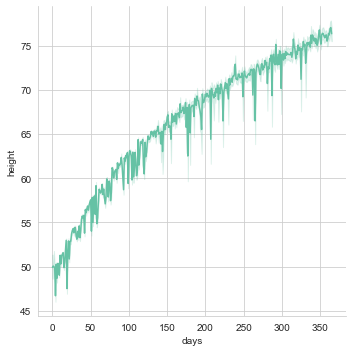

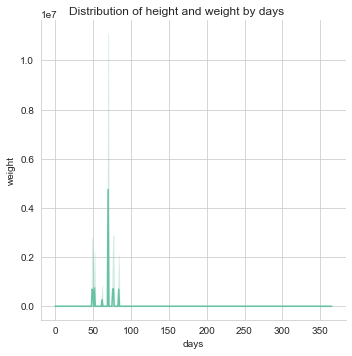

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'days' 열에 대해 'height'와 'weight' 열의 분포를 시각화
sns.relplot(x='days', y='height', data=baby_growth_df, kind='line')
sns.relplot(x='days', y='weight', data=baby_growth_df, kind='line')

# 그래프에 제목을 추가
plt.suptitle('Distribution of height and weight by days')

# 그래프 출력
plt.show()

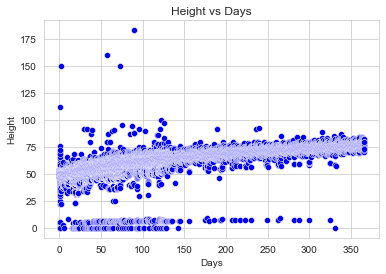

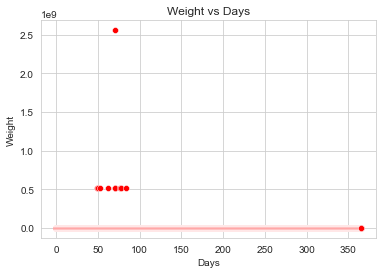

In [181]:
sns.set_style('whitegrid')

sns.scatterplot(x='days', y='height', data=baby_growth_df, color='blue')
plt.title('Height vs Days')
plt.xlabel('Days')
plt.ylabel('Height')
plt.show()

sns.scatterplot(x='days', y='weight', data=baby_growth_df, color='red')
plt.title('Weight vs Days')
plt.xlabel('Days')
plt.ylabel('Weight')
plt.show()

In [193]:
# 이상치 제거 함수
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# 생후 일 수 별로 그룹화
grouped = baby_growth_df.groupby('days')

# 각 생후 일 수별로 이상치 제거된 데이터프레임을 저장할 빈 데이터프레임 생성
cleaned_df = pd.DataFrame(columns=baby_growth_df.columns)

# 생후 일 수(days)별로 이상치 제거된 데이터를 cleaned_df에 추가
for name, group in grouped:
    group = remove_outliers(group, 'height')
    group = remove_outliers(group, 'weight')
    cleaned_df = pd.concat([cleaned_df, group])


In [198]:
cleaned_df

,_id,days,desc,__v,growth,height,weight,gender_F,gender_M
1,62f8dd9bc2d4a7f9032b9c8d,0.0,총 수유량: 430 cc\n소변 횟수: 16\n대변: 2,0,"{'weight': {'value': 2.77, 'unit': 'kg', 'std'...",48.30,2.77,1.0,0.0
27,58a77332aa513c7c8cf0a942,0.0,17.02.15\n새벽:5시50분 -이슬비침\n\n-계속 약한 배 통증있음 \n\n...,0,"{'head': {'value': 35.5, 'std': 35.5, 'unit': ...",49.00,3.20,1.0,0.0
22,59a610cf1787fa4f4a3a1905,0.0,NaN,0,"{'head': {'value': 34.5, 'unit': 'cm', 'std': ...",46.50,2.77,1.0,0.0
17,5ab0230abbd2ac53661aaa2a,0.0,NaN,0,"{'weight': {'unit': 'kg', 'value': 3.78, 'std'...",52.00,3.78,0.0,1.0
16,5ab023294ba8ac623954eec1,0.0,청각검사 정상,0,"{'weight': {'unit': 'kg', 'std': 3.78, 'value'...",52.00,3.78,0.0,1.0
...,...,...,...,...,...,...,...,...,...
43773,613ce981d8ba22cb4eddab90,365.0,드디어 우리리우 첫돌 하루남았다🎊\n리우가 벌써 돌이라니!\n비록 잔치는 11월로 ...,0,"{'height': {'value': 82, 'unit': 'cm', 'std': ...",82.00,13.20,0.0,1.0
43779,60fd1030d88d65dfa2625762,365.0,NaN,0,"{'height': {'value': 79.7, 'unit': 'cm', 'std'...",79.70,10.30,0.0,1.0
43780,60e7cd722f0e2f96d8e1b099,365.0,젖병떼기 연습.\n빨대컵에 분유주기 시작.,0,"{'weight': {'value': 9.4, 'unit': 'kg', 'std':...",73.94,9.40,1.0,0.0
43783,60ac47a2214aa2f42de83cb8,365.0,NaN,0,"{'weight': {'value': 11.8, 'unit': 'kg', 'std'...",79.44,11.80,0.0,1.0


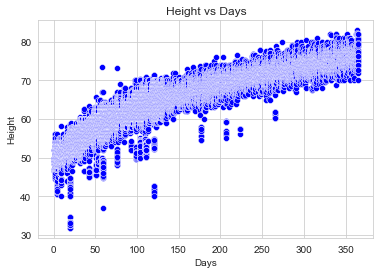

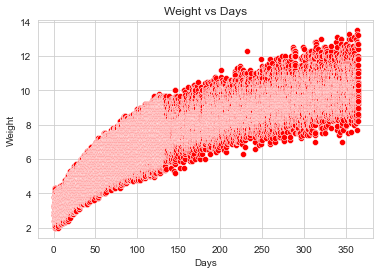

In [194]:
sns.set_style('whitegrid')

sns.scatterplot(x='days', y='height', data=cleaned_df, color='blue')
plt.title('Height vs Days')
plt.xlabel('Days')
plt.ylabel('Height')
plt.show()

sns.scatterplot(x='days', y='weight', data=cleaned_df, color='red')
plt.title('Weight vs Days')
plt.xlabel('Days')
plt.ylabel('Weight')
plt.show()

### Looker를 사용하기 위해 csv 파일로 저장

In [205]:
baby_info_df = cleaned_df.copy()

In [206]:
baby_info_df.drop(['desc','__v','growth'], axis = 1, inplace=True)
baby_info_df

,_id,days,height,weight,gender_F,gender_M
1,62f8dd9bc2d4a7f9032b9c8d,0.0,48.30,2.77,1.0,0.0
27,58a77332aa513c7c8cf0a942,0.0,49.00,3.20,1.0,0.0
22,59a610cf1787fa4f4a3a1905,0.0,46.50,2.77,1.0,0.0
17,5ab0230abbd2ac53661aaa2a,0.0,52.00,3.78,0.0,1.0
16,5ab023294ba8ac623954eec1,0.0,52.00,3.78,0.0,1.0
...,...,...,...,...,...,...
43773,613ce981d8ba22cb4eddab90,365.0,82.00,13.20,0.0,1.0
43779,60fd1030d88d65dfa2625762,365.0,79.70,10.30,0.0,1.0
43780,60e7cd722f0e2f96d8e1b099,365.0,73.94,9.40,1.0,0.0
43783,60ac47a2214aa2f42de83cb8,365.0,79.44,11.80,0.0,1.0


In [207]:
# baby_info_df.to_csv("C:/Users/김주영/Desktop/2023-1/캡스톤설계및실습/Capstone_Project/Capston_Project/babyinfo2.csv", encoding='cp949',index=False)